# 🤖 AI, CA3, Machine Learning 📚  

* **Name** : Mahdy 🖊  
* **Last Name** : Mokhtari 📝  
* **SID** : 810101515 🆔

## 🧹 Data Preprocessing  
Implement all your preprocessing in this section, following the guidelines provided in the project documentation 📄.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import re
from google.colab import drive
import os
import numpy as np

### 📥 Load Dataset  
In this subsection, you should load the dataset as a pandas dataframe 🐼.

In [2]:
drive.mount('/content/drive')
csv_file_path = '/content/drive/My Drive/hotels_in_europe.csv'
df = pd.read_csv(csv_file_path)

Mounted at /content/drive


## 🔍 EDA
In this section, I will have a brief look at the dataset so I could make better decisions in the pre-processing part.

In [3]:
print(df.columns)
print(df.head(6))

Index(['name', 'location', 'price', 'rating', 'quality', 'review', 'bed',
       'size', 'distance_from_center', 'room_type', 'nights', 'adults',
       'free_cancellation'],
      dtype='object')
                              name          location          price  rating  \
0                        WIT Hotel   9th arr., Paris  IRR 7,951,542     7.1   
1  UCPA SPORT STATION HOSTEL PARIS  19th arr., Paris  IRR 1,397,677     8.0   
2              Timhotel Montmartre  18th arr., Paris  IRR 7,569,083     8.3   
3     Hôtel Galileo Champs Elysées   8th arr., Paris  IRR 6,447,737     8.6   
4                    Hôtel Le Daum  12th arr., Paris  IRR 7,913,496     8.3   
5              Le Relais du Marais   3rd arr., Paris  IRR 9,259,111     8.0   

     quality         review                 bed  size  distance_from_center  \
0       Good  3,300 reviews        1 double bed  20m²                   1.9   
1  Very good  5,921 reviews        1 single bed   NaN                   4.6   
2  Very good

We can see that the "free_cancellation" and "size" column are mostly NaN. lets see what portion of the "size" is NaN.

In [4]:
print('Number of NaN in "size" column:  ', df["size"].isna().sum())
print('Portion of NaN in "size" column:  ', int(100 * df["size"].isna().sum() / df.shape[0]), "%")
print("--------------------------")
print('Number of NaN in "free_cancellation" column:  ', df["free_cancellation"].isna().sum())
print('Portion of NaN in "free_cancellation" column:  ', int(100 * df["free_cancellation"].isna().sum() / df.shape[0]), "%")

Number of NaN in "size" column:   4868
Portion of NaN in "size" column:   66 %
--------------------------
Number of NaN in "free_cancellation" column:   6739
Portion of NaN in "free_cancellation" column:   92 %


Some columns may not be that important to us we will check them later on more precisely but for now i want to know how many unique values we have in colmuns "**name**" and "**location**".

In [5]:
print('Number of Unique value in "name" column:  ', df["name"].nunique())
print("--------------------------")
print('Number of Unique value in "location" column:  ', df["location"].nunique())
print('Number of Unique value in "free_cancellation" column:  ', df["free_cancellation"].nunique())

Number of Unique value in "name" column:   949
--------------------------
Number of Unique value in "location" column:   75
Number of Unique value in "free_cancellation" column:   1


### Genrsal structure
Lets identify the general structure of the dataset.

In [6]:
print(df.describe)

<bound method NDFrame.describe of                                                    name  \
0                                             WIT Hotel   
1                       UCPA SPORT STATION HOSTEL PARIS   
2                                   Timhotel Montmartre   
3                          Hôtel Galileo Champs Elysées   
4                                         Hôtel Le Daum   
...                                                 ...   
7317                                   Eurostars Berlin   
7318               Hotel Domicil Berlin by Golden Tulip   
7319  Crowne Plaza Berlin City Centre Ku'damm, an IH...   
7320                      Leonardo Hotel Berlin KU'DAMM   
7321  Holiday Inn Express Berlin City Centre, an IHG...   

                                location           price  rating    quality  \
0                        9th arr., Paris   IRR 7,951,542     7.1       Good   
1                       19th arr., Paris   IRR 1,397,677     8.0  Very good   
2                   

### Unique values

The number of unique values of each column is represented with plot to get a better prespective.

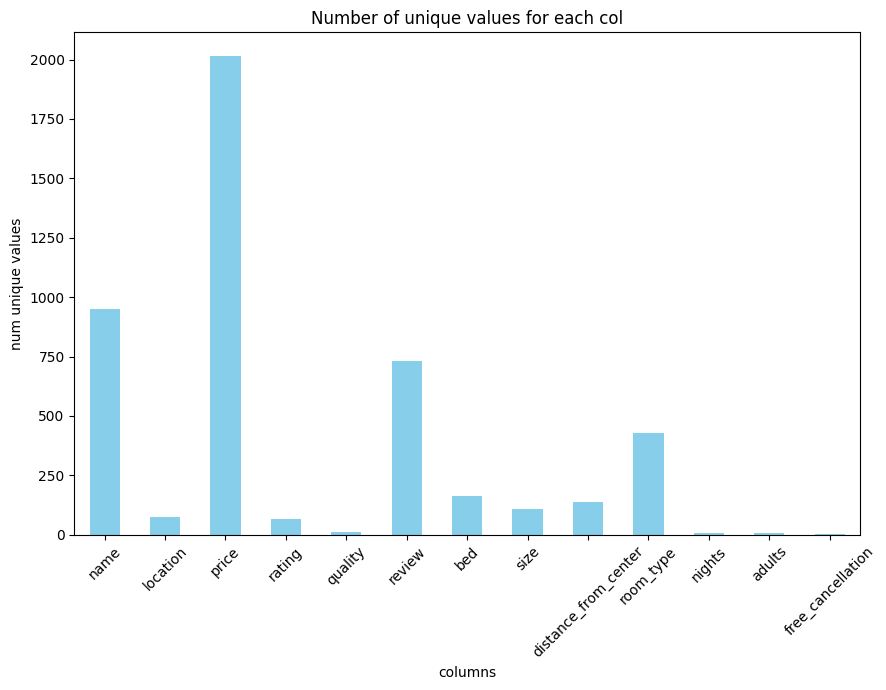

In [7]:
#now each column has its number of unique values
df_unique_values = df.nunique()
plt.figure(figsize=(9, 7))
df_unique_values.plot(kind="bar", color="skyblue")

plt.title("Number of unique values for each col")
plt.xlabel("columns")
plt.ylabel("num unique values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

One of the deductions I made is that the name column isnt important at all because first of all it show the name and it doesn't have any effect on the price of the hotel.

Secondly, the plot shows we have a variety of names, and because they are not numerical and they are categorical so it shows it can't be important for our models and we will remove this column later.

### ➕ Additional Columns  
In this subsection, you should add some additional columns to the dataframe, according to the project documentation 📄.

#### Price

lets add a another column of absolute price. Then remove the original

In [8]:
def extract_prices(value):
    if isinstance(value, str):
        numeric_part = ''.join(c for c in value if c.isdigit() or c == ',')
        numeric_part = numeric_part.replace(',', '')
        try:
            return int(numeric_part)
        except ValueError:
            return np.nan
    return np.nan

df['abs_price'] = df['price'].map(extract_prices)
df = df.drop("price", axis=1)

### 🧩 Manipulate Columns 🔢  
In this subsection, you should extract numerical values from columns and also convert categorical data to numerical values,as described in the project documentation 📄.

#### Name

First of all lets remove "**name**" col that doesnt matter at all as we saw from the EDA


In [9]:
df = df.drop("name", axis=1)

#### Location

Now we give labels to the "**location**" col.

In [10]:
label_encoder = LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])

#### Quality

Lest convert the quality from categorical to numeric and in a way that as it gets better the number assigned to it will be higher

In [11]:
unique_quality_values = df['quality'].unique().tolist()
print(unique_quality_values)

['Good', 'Very good', 'Fabulous', 'Superb', 'Review score', 'Exceptional', nan, 'Good 7.3', 'Superb 9.0', 'Fabulous 8.9', 'Fabulous 8.7', 'Exceptional 9.6', 'Review score 6.4', 'Very good 8.1']


In [12]:
dict_convert_quality_cat_to_num = {
    "Review score": 1,
    'Review score 6.4': 1,
    'Good': 3,
    'Good 7.3': 3,
    'Very good': 4,
    'Very good 8.1': 4,
    'Fabulous': 5,
    'Fabulous 8.7': 5,
    'Superb': 6,
    'Superb 9.0': 6,
    'Exceptional': 7,
    'Exceptional 9.6': 7
}
df['quality'] = df['quality'].map(dict_convert_quality_cat_to_num)
unique_quality_values = df['quality'].unique().tolist()
print(unique_quality_values)

[3.0, 4.0, 5.0, 6.0, 1.0, 7.0, nan]


#### Reviews

I will remove the word "review" from all the instances.

In [13]:
def extract_first_int(value):
    if isinstance(value, str):
        match = re.search(r'\d+', value)
        return int(match.group(0)) if match else None
    return None

unique_reviews_values = df['review'].unique().tolist()
print(unique_reviews_values)

['3,300 reviews', '5,921 reviews', '2,532 reviews', '1,457 reviews', '1,273 reviews', '1,695 reviews', '1,155 reviews', '864 reviews', '1,668 reviews', '1,169 reviews', '11,103 reviews', '1,843 reviews', '2,242 reviews', '2,923 reviews', '1,127 reviews', '480 reviews', '1,206 reviews', '7,379 reviews', '10,599 reviews', '541 reviews', '1,371 reviews', '1,720 reviews', '1,499 reviews', '2,471 reviews', '2,867 reviews', '1,714 reviews', '1,548 reviews', '10,437 reviews', '1,995 reviews', '1,078 reviews', '762 reviews', '1,552 reviews', '4,902 reviews', '8,372 reviews', '409 reviews', '11,172 reviews', '424 reviews', '2,327 reviews', '3,660 reviews', '4,160 reviews', '8,793 reviews', '6,731 reviews', '2,264 reviews', '5,006 reviews', '1,954 reviews', '2,139 reviews', '252 reviews', '4,442 reviews', '2,291 reviews', '5,569 reviews', '1,124 reviews', '51 reviews', '13,873 reviews', '5,365 reviews', '5,411 reviews', '4,114 reviews', '10,739 reviews', '4,014 reviews', '58 reviews', '3,675 rev

In [14]:
def extract_reviews(value):
    if isinstance(value, str):
        numeric_part = value.replace(',', '').split()[0]
        try:
            return int(numeric_part)
        except ValueError:
            return np.nan
    return np.nan


df['review'] = df['review'].map(extract_reviews)
unique_reviews_values = df['review'].unique().tolist()
print(unique_reviews_values)


[3300.0, 5921.0, 2532.0, 1457.0, 1273.0, 1695.0, 1155.0, 864.0, 1668.0, 1169.0, 11103.0, 1843.0, 2242.0, 2923.0, 1127.0, 480.0, 1206.0, 7379.0, 10599.0, 541.0, 1371.0, 1720.0, 1499.0, 2471.0, 2867.0, 1714.0, 1548.0, 10437.0, 1995.0, 1078.0, 762.0, 1552.0, 4902.0, 8372.0, 409.0, 11172.0, 424.0, 2327.0, 3660.0, 4160.0, 8793.0, 6731.0, 2264.0, 5006.0, 1954.0, 2139.0, 252.0, 4442.0, 2291.0, 5569.0, 1124.0, 51.0, 13873.0, 5365.0, 5411.0, 4114.0, 10739.0, 4014.0, 58.0, 3675.0, 814.0, 1037.0, 78.0, 3079.0, 1492.0, 1115.0, 4799.0, 12885.0, 8375.0, 4965.0, 15446.0, 1010.0, 21183.0, 4509.0, 7451.0, 5527.0, 3174.0, 2410.0, 5914.0, 5332.0, 1894.0, 13230.0, 8348.0, 2489.0, 865.0, 1740.0, 7597.0, 4711.0, 3852.0, 9406.0, 2319.0, 1438.0, 3154.0, 152.0, 1491.0, 17.0, 16.0, 214.0, 11.0, 299.0, 35.0, 20899.0, 5226.0, 7954.0, 1686.0, 1379.0, 11086.0, 4233.0, 1639.0, 5791.0, 5190.0, 4062.0, 368.0, 1613.0, 6625.0, 521.0, 25125.0, 4317.0, 998.0, 7541.0, 4365.0, 3315.0, 1486.0, 14004.0, 3864.0, 8.0, 1849.0, 1

Lets Transform "**Reviews**" by getting its log

In [15]:
df['review'] = df['review'].apply(lambda x: np.log2(x))
unique_reviews_values = df['review'].unique().tolist()
print(unique_reviews_values)

[11.688250309133178, 12.531625138422624, 11.306061689428342, 10.508785162064513, 10.314016703901357, 10.727069558023706, 10.17367713630342, 9.754887502163468, 10.703903573444663, 10.191059214531656, 13.438661921021376, 10.847840355630714, 11.130570562805426, 11.513234113806053, 10.138271800172221, 8.906890595608518, 10.236014191900084, 12.849209600569264, 13.371640534611808, 9.079484783826816, 10.421012855779226, 10.74819284958946, 10.54978466794786, 11.270879295328784, 11.485326189240524, 10.7431513941125, 10.59618975614441, 13.349419464341047, 10.962173031109709, 10.074141462752506, 9.573647187493322, 10.599912842187127, 12.25915476886684, 13.031356596255709, 8.67595703294175, 13.44759985827995, 8.727920454563199, 11.184255495405349, 11.837627933171404, 12.022367813028454, 13.102139753410698, 12.716605141335364, 11.144658242831882, 12.289442575688332, 10.932214751968385, 11.062720767165045, 7.977279923499917, 12.116993677546981, 11.161761743304675, 12.443202577297011, 10.134426320220

#### Bed

I want to just extract the first int of it loike how many beds it is.

In [16]:
df['bed'] = df['bed'].apply(extract_first_int)
print(df['bed'].head())

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: bed, dtype: float64


#### Nights & Adults

I should just remove the "nights" and the "adults" and it wil be fine.

In [17]:
df['nights'] = df['nights'].apply(extract_first_int)
df['adults'] = df['adults'].apply(extract_first_int)
print(df['nights'])
print(df['adults'])

0       1
1       1
2       1
3       1
4       1
       ..
7317    4
7318    4
7319    4
7320    4
7321    4
Name: nights, Length: 7322, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
7317    2
7318    2
7319    2
7320    2
7321    2
Name: adults, Length: 7322, dtype: int64


#### Room Type

Give it a labeled number code.

In [18]:
label_encoder = LabelEncoder()
df['room_type'] = label_encoder.fit_transform(df['room_type'])


### 🛠 Handling Missing Values 💡
In this subsection, you are supposed to handle null and missing values, following regular techinuques, used in this context


3 Strategies of handling missing values:


1.  **Drop**  the row

2.  Fill NaN using statistical techniques like,** median, mean, mode**

3.  If there is procedural structure use **Forward/Backward fill **

The third option may work because we have a procedure and a trend on the dataset, but I didn't use it for simplicity.



In [19]:
print(df.loc[2596], end='\n\n******************************************************\n\n')
df['rating'] = df['rating'].fillna(df['rating'].median())  # I used Median for rating
print(df.loc[2596])

location                     11
rating                      NaN
quality                     NaN
review                      NaN
bed                         3.0
size                        NaN
distance_from_center        3.5
room_type                   233
nights                        2
adults                        5
free_cancellation           NaN
abs_price               9459351
Name: 2596, dtype: object

******************************************************

location                     11
rating                      8.0
quality                     NaN
review                      NaN
bed                         3.0
size                        NaN
distance_from_center        3.5
room_type                   233
nights                        2
adults                        5
free_cancellation           NaN
abs_price               9459351
Name: 2596, dtype: object


#### "Free Cancellation" Col

According to my observations in the EDA part i noticed the "free_cancellation" has only one unique value that is "**free cancellation**" so it means whenever this is not writen we could say they meant the the other value if we call it a binary feature that is "**No Free Cancelation**"

""Free Cancelation"" -> 1
""No Free cacelation"" -> 0

In [20]:
df['free_cancellation'] = df['free_cancellation'].isna().astype(int)

#### "Size" Col

This column has 66% NaN values and it doesnt realy tell us so mush and i dont think filling this column is good idea so I will remove the entire column.

In [21]:
df = df.drop('size', axis=1)

Lets see if we have any other missing values.

In [22]:
# print("Number of missing values:  ", df.isna().sum(axis=1).to_string())
# print(df.head())
# print(df.loc[2596])
print("Total number of NaNs:  ",  df.isna().sum().sum())
print("Number of rows that have NaNs now:  ", df.isna().any(axis=1).sum())
print("Total number of rows:  ", df.shape[0])

Total number of NaNs:   777
Number of rows that have NaNs now:   624
Total number of rows:   7322


As we see there are only 624 columns with missing values and compared to the 7322 rows of our dataset it isn't a considerable amount so I will drop them entirely.

In [23]:
df = df.dropna(inplace=False)
print(df.info())
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 6698 entries, 0 to 7321
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              6698 non-null   int64  
 1   rating                6698 non-null   float64
 2   quality               6698 non-null   float64
 3   review                6698 non-null   float64
 4   bed                   6698 non-null   float64
 5   distance_from_center  6698 non-null   float64
 6   room_type             6698 non-null   int64  
 7   nights                6698 non-null   int64  
 8   adults                6698 non-null   int64  
 9   free_cancellation     6698 non-null   int64  
 10  abs_price             6698 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 627.9 KB
None
      location  rating  quality     review  bed  distance_from_center  \
0           19     7.1      3.0  11.688250  1.0                   1.9   
1            9     8.0      4.0 

### 🏷 Assigning Labels  
In this subsection, we want to assign labels to hotels 🏨, according to their price 💰.  
We have two labels:  
- **0** for hotels with a price less than a threshold 🟢.  
- **1** for those with higher prices 🔴.  

To determine the threshold, we use the median of prices 📊.  
In the first step, complete the following function. Then, you should use the `apply` method of pandas 🐼 to assign labels to each hotel.

In [24]:
def assign_label(x, median_column):
    """
        x:price(int),
        median_column:"price"(float),
        returns label of x as explained
    """
    return 1 if x > median_column else 0

median_price = df['abs_price'].median()
df['price_label'] = df['abs_price'].apply(assign_label, median_column=median_price)

print(df)


# Another way of Binarization

# from sklearn.preprocessing import Binarizer
# data = [[1, 2], [3, 4], [5, 6]]
# binarizer = Binarizer(threshold=3)
# binarized_data = binarizer.fit_transform(data)

      location  rating  quality     review  bed  distance_from_center  \
0           19     7.1      3.0  11.688250  1.0                   1.9   
1            9     8.0      4.0  12.531625  1.0                   4.6   
2            8     8.3      4.0  11.306062  1.0                   3.4   
3           18     8.6      5.0  10.508785  1.0                   4.2   
4            2     8.3      4.0  10.314017  1.0                   4.1   
...        ...     ...      ...        ...  ...                   ...   
7316        49     7.8      3.0  10.773139  1.0                   1.9   
7317        49     8.0      4.0  12.534546  1.0                   0.9   
7318        30     7.7      3.0  10.594325  2.0                   4.9   
7320        30     8.0      4.0  13.075312  1.0                   3.9   
7321        35     8.2      4.0  13.593391  1.0                   1.7   

      room_type  nights  adults  free_cancellation  abs_price  price_label  
0           343       1       1               

<ipython-input-24-d6cf42a58726>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_label'] = df['abs_price'].apply(assign_label, median_column=median_price)


## 📊 Data Visualization  
Research and explore various data visualization techniques 🔍 to identify the best options for your project 🎯. Different approaches may be suitable for different aspects of your data 📈.

### Feature Plot

We will show a plot that will represent correlation betweeen the features of the dataFrame and the between the **price** and other features.

In [25]:
print("Corelation between variables")
print(df.corr())
df_ready = df.drop(columns=['room_type', 'location'], inplace=False)

Corelation between variables
                      location    rating   quality    review       bed  \
location              1.000000 -0.001534  0.019744  0.117241  0.038095   
rating               -0.001534  1.000000  0.877430  0.194970 -0.142997   
quality               0.019744  0.877430  1.000000  0.098389 -0.095325   
review                0.117241  0.194970  0.098389  1.000000 -0.407623   
bed                   0.038095 -0.142997 -0.095325 -0.407623  1.000000   
distance_from_center -0.095557  0.100178  0.122796  0.042930  0.007351   
room_type             0.003785  0.090360  0.074502 -0.058815  0.112014   
nights               -0.019008  0.002052  0.024898 -0.076961  0.107160   
adults                0.008939 -0.160817 -0.127352 -0.440910  0.660415   
free_cancellation    -0.097717 -0.021724 -0.012191 -0.263608  0.161691   
abs_price            -0.033379  0.196531  0.225302  0.005064  0.118613   
price_label          -0.022720  0.172515  0.199539  0.012588  0.128922   

        

In [26]:
print(df_ready)

      rating  quality     review  bed  distance_from_center  nights  adults  \
0        7.1      3.0  11.688250  1.0                   1.9       1       1   
1        8.0      4.0  12.531625  1.0                   4.6       1       1   
2        8.3      4.0  11.306062  1.0                   3.4       1       1   
3        8.6      5.0  10.508785  1.0                   4.2       1       1   
4        8.3      4.0  10.314017  1.0                   4.1       1       1   
...      ...      ...        ...  ...                   ...     ...     ...   
7316     7.8      3.0  10.773139  1.0                   1.9       4       2   
7317     8.0      4.0  12.534546  1.0                   0.9       4       2   
7318     7.7      3.0  10.594325  2.0                   4.9       4       2   
7320     8.0      4.0  13.075312  1.0                   3.9       4       2   
7321     8.2      4.0  13.593391  1.0                   1.7       4       2   

      free_cancellation  abs_price  price_label  
0

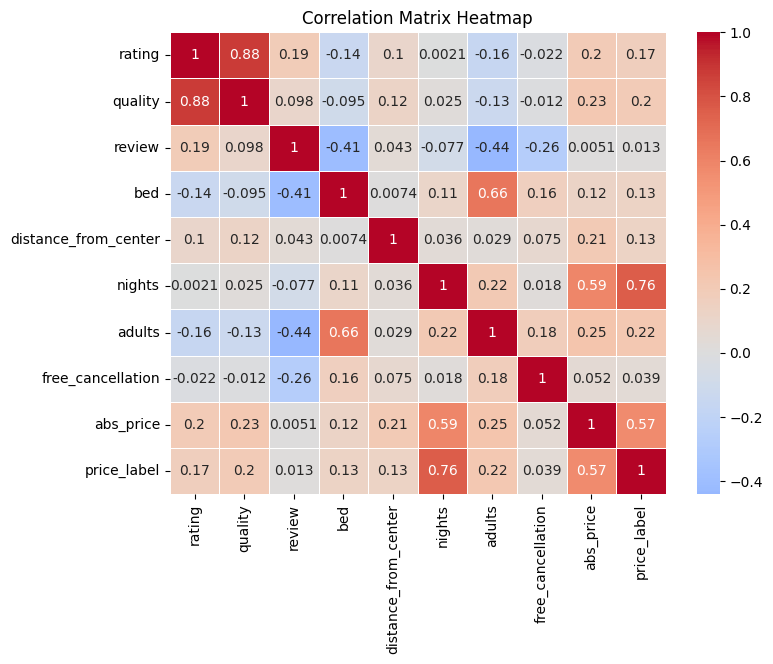

In [27]:
corr_matrix = df_ready.corr()

# heatmap correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

As we can see that becuases the"**locatio**n" and "**room_type**" were randimly labeld the correlation is near 0 meaning we dont have anything here to relate so it means the price is very independent from those 2 features.

Another thing I noticed was it the price had some relation with the "**rating**", "**quality**", or the "**distance from center**" . Mostly it had a positive correlation with the "**number of nights**" they booked the hotel as in fact we could tell just by like observing ourselves if we book n nights its very likely to have n times the price of one night. After that it has the most correlation with "**number of adults**"





In [28]:
print(df_ready.describe())  # describe
print(df_ready.info())  # info

            rating      quality       review          bed  \
count  6698.000000  6698.000000  6698.000000  6698.000000   
mean      7.730546     3.453867     9.460070     2.360705   
std       1.138277     1.465661     3.440985     1.403857   
min       1.000000     1.000000     0.000000     1.000000   
25%       7.300000     3.000000     7.364090     1.000000   
50%       8.000000     4.000000    10.611947     2.000000   
75%       8.400000     4.000000    11.946906     3.000000   
max      10.000000     7.000000    14.616836    14.000000   

       distance_from_center       nights       adults  free_cancellation  \
count           6698.000000  6698.000000  6698.000000        6698.000000   
mean              24.105016     2.655420     3.305464           0.918035   
std               80.548677     1.483406     1.215660           0.274332   
min                0.500000     1.000000     1.000000           0.000000   
25%                2.300000     1.000000     2.000000           1.0000

### Hexbin & Scatter

Let's find the relation between the dependent variable (price) with the other independent values.

#### **Rating**-**Price** Plot

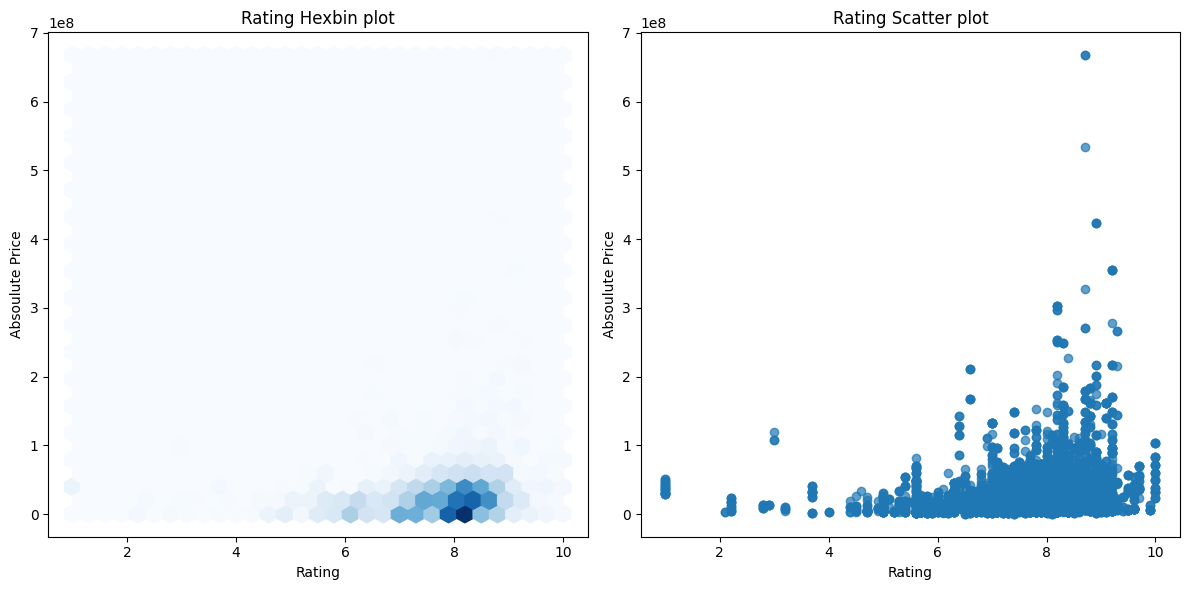

In [29]:
 fig, axes = plt.subplots(1, 2, figsize=(12,6))

x = df_ready['rating']
y = df_ready['abs_price']

# Hexbin
axes[0].hexbin(x, y, gridsize=30, cmap='Blues')
axes[0].set_title("Rating Hexbin plot")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Absoulute Price")
# axes[0].colorbar(label='Density')

# Scatter
axes[1].scatter(x, y, alpha=0.7)
axes[1].set_title("Rating Scatter plot")
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Absoulute Price")


plt.tight_layout()
plt.show()

#### **Quality**-**Price** Plot

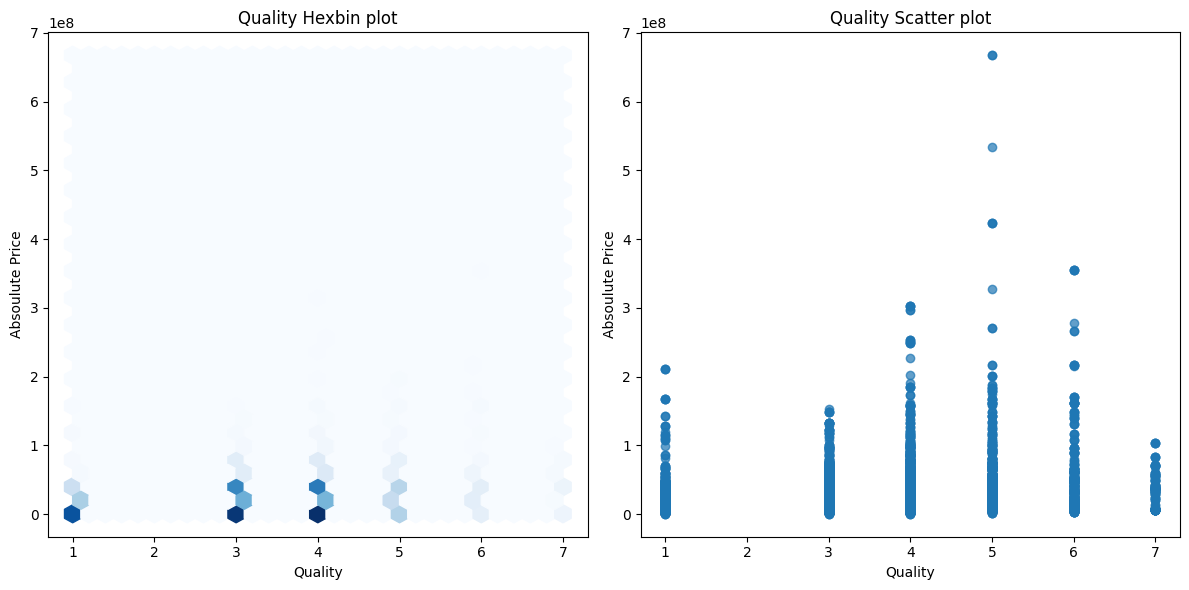

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

x = df_ready['quality']
y = df_ready['abs_price']

# Hexbin
axes[0].hexbin(x, y, gridsize=30, cmap='Blues')
axes[0].set_title("Quality Hexbin plot")
axes[0].set_xlabel("Quality")
axes[0].set_ylabel("Absoulute Price")
# axes[0].colorbar(label='Density')

# Scatter
axes[1].scatter(x, y, alpha=0.7)
axes[1].set_title("Quality Scatter plot")
axes[1].set_xlabel("Quality")
axes[1].set_ylabel("Absoulute Price")


plt.tight_layout()
plt.show()

#### **Review**-**Price** Plot

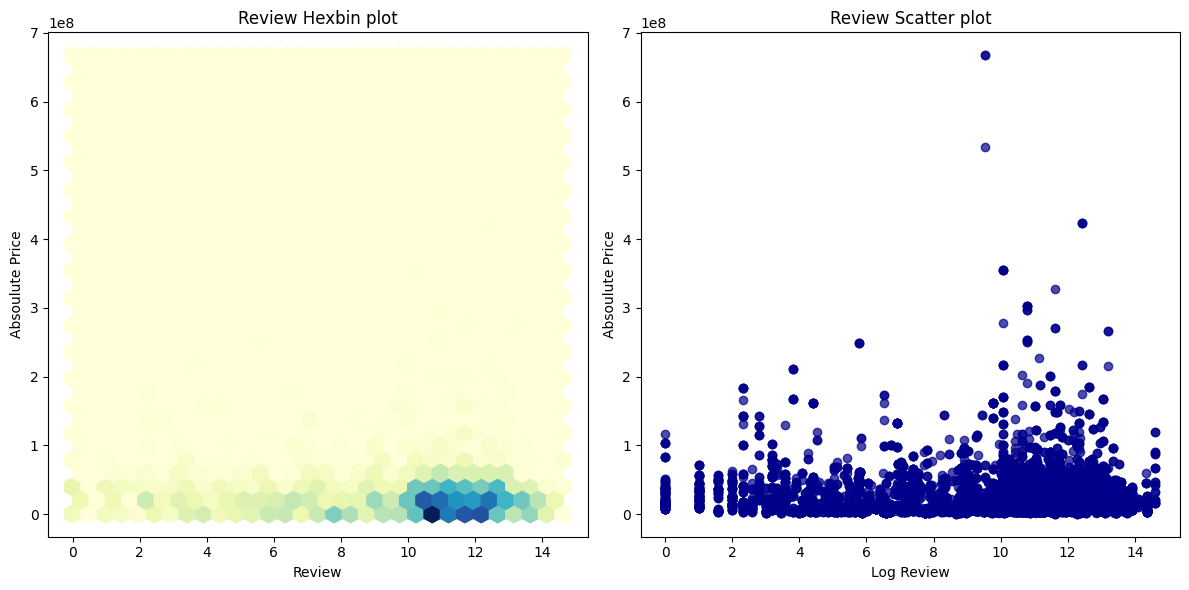

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

x = df_ready['review']
y = df_ready['abs_price']

# Hexbin
axes[0].hexbin(x, y, gridsize=30, cmap='YlGnBu')
axes[0].set_title("Review Hexbin plot")
axes[0].set_xlabel("Review")
axes[0].set_ylabel("Absoulute Price")
# axes[0].colorbar(label='Density')

# Scatter
axes[1].scatter(x, y, alpha=0.7, color='darkblue')
axes[1].set_title("Review Scatter plot")
axes[1].set_xlabel("Log Review")
axes[1].set_ylabel("Absoulute Price")


plt.tight_layout()
plt.show()

#### **Adults**-**Price** Plot

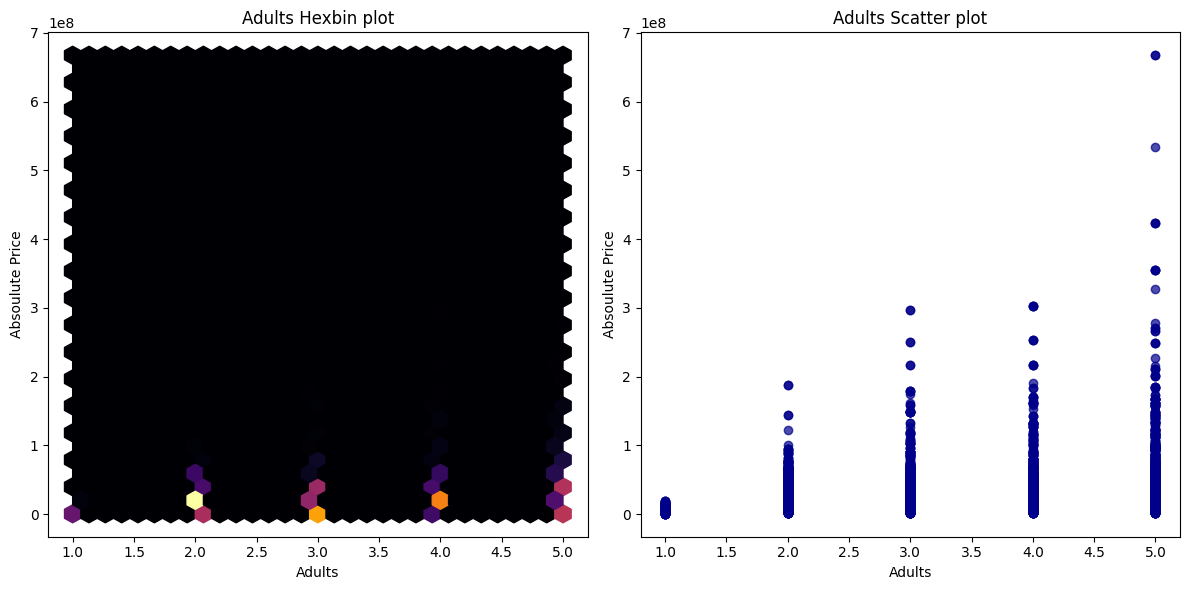

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

x = df_ready['adults']
y = df_ready['abs_price']

# Hexbin
axes[0].hexbin(x, y, gridsize=30, cmap='inferno')
axes[0].set_title("Adults Hexbin plot")
axes[0].set_xlabel("Adults")
axes[0].set_ylabel("Absoulute Price")
# axes[0].colorbar(label='Density')

# Scatter
axes[1].scatter(x, y, alpha=0.7, color='darkblue')
axes[1].set_title("Adults Scatter plot")
axes[1].set_xlabel("Adults")
axes[1].set_ylabel("Absoulute Price")


plt.tight_layout()
plt.show()

#### **Nights**-**Price** Plot

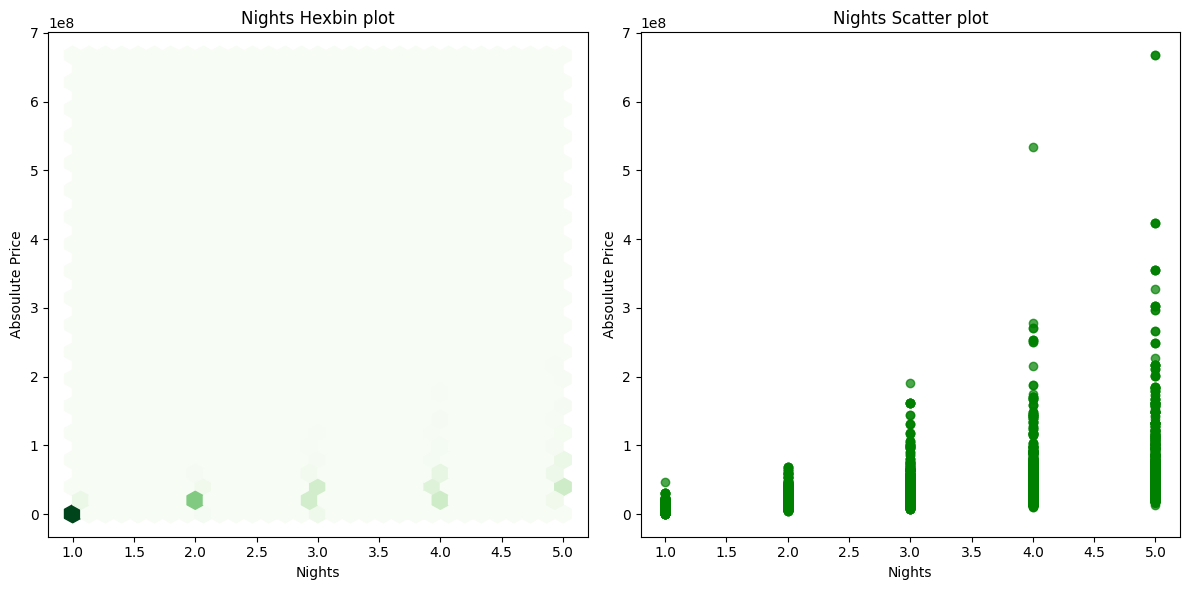

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

x = df_ready['nights']
y = df_ready['abs_price']

# Hexbin
axes[0].hexbin(x, y, gridsize=30, cmap='Greens')
axes[0].set_title("Nights Hexbin plot")
axes[0].set_xlabel("Nights")
axes[0].set_ylabel("Absoulute Price")
# axes[0].colorbar(label='Density')

# Scatter
axes[1].scatter(x, y, alpha=0.7, color='green')
axes[1].set_title("Nights Scatter plot")
axes[1].set_xlabel("Nights")
axes[1].set_ylabel("Absoulute Price")


plt.tight_layout()
plt.show()

### Other EDA methods

#### Box and Violin Plots



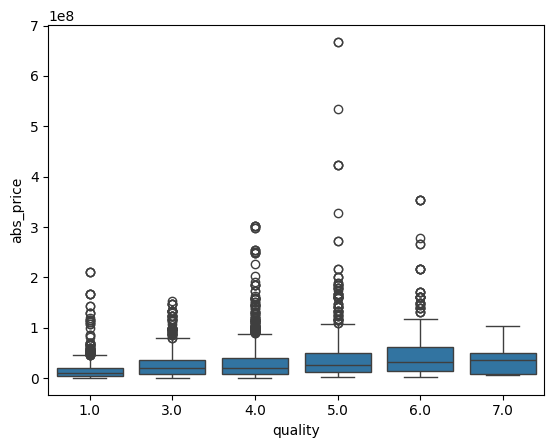

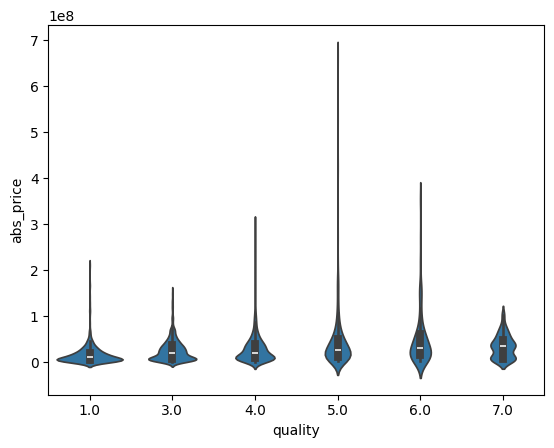

In [34]:
# Boxplot of abs_price by rating or quality (if they are discrete/categorical)
sns.boxplot(x='quality', y='abs_price', data=df_ready)
plt.show()

# Violin plot for a smoother visualization of distribution
sns.violinplot(x='quality', y='abs_price', data=df_ready)
plt.show()

#### Pairwise Scatter Plots with abs_price

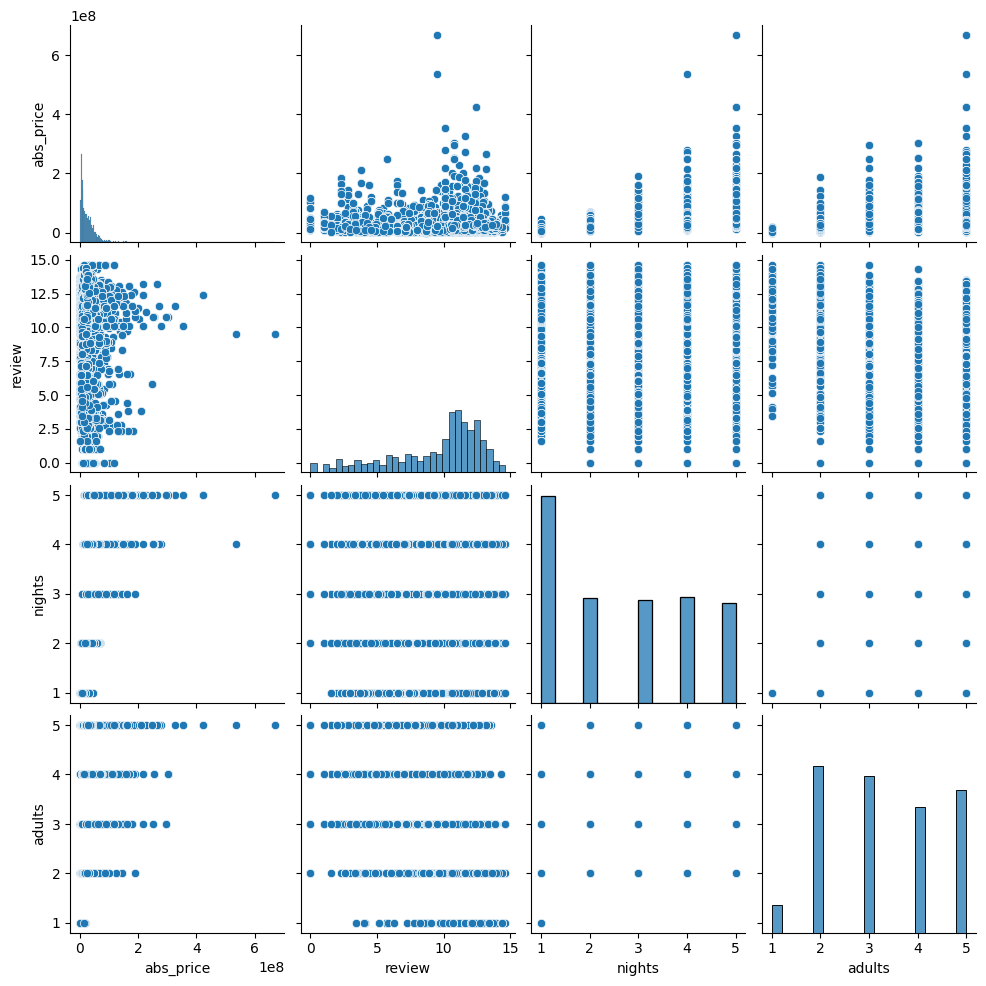

In [35]:
sns.pairplot(df_ready[['abs_price', 'review', 'nights', 'adults',]])
plt.show()

## 🏷 Classification  
In this section, we will go through the classification pipeline. We will deploy several machine learning models to classify hotels based on their price 💵. Finally, you will implement a boosting algorithm from scratch 🛠 and compare its performance with the library implementation 📚.

### 🔀 Train-Test Split  
You should divide the data into a training set and a test set. Use 20% of the data for testing and 80% for training 📊.

In [36]:
from sklearn.model_selection import train_test_split

RANODM_STATE=21

df_shuffled = df_ready.sample(frac=1, random_state=RANODM_STATE)

features_x = df_shuffled[['adults', 'nights', 'rating', 'quality', 'review', 'bed', 'distance_from_center', 'free_cancellation']]
dependent_variable_y = df_shuffled['price_label']

##### important line #####
x_train_df, x_test_df, y_train_series, y_test_series = train_test_split(features_x, dependent_variable_y, test_size=0.2, random_state=RANODM_STATE)

print(x_train_df.tail(), x_test_df.tail(), y_train_series.tail(), y_test_series.tail(), sep='\n\n-----------------------------------------\n\n')

      adults  nights  rating  quality     review  bed  distance_from_center  \
2167       5       1     6.3      1.0  11.234817  3.0                   1.5   
1120       5       2     8.1      4.0   4.954196  3.0                   5.5   
6638       3       1     8.2      4.0  13.593391  2.0                   1.7   
106        1       1     7.2      3.0  11.837628  1.0                   0.9   
3278       4       5     8.0      4.0  10.847057  4.0                   0.8   

      free_cancellation  
2167                  1  
1120                  1  
6638                  0  
106                   1  
3278                  1  

-----------------------------------------

      adults  nights  rating  quality     review  bed  distance_from_center  \
4306       2       3     8.8      5.0  12.207624  1.0                   1.4   
1642       5       2     5.3      1.0   3.584963  3.0                   4.9   
3639       4       5     7.4      3.0  11.674192  2.0                   4.9   
2543     


### 🌐 Normalization  
One of the most important steps in the classification pipeline is normalization. You will be asked about the importance of this step ⚙️.

#### Different Transformers



*   Log
*   MinMaxScaler
*   StandardScaler
*   Binarizer
*   OneHotEncoder
*   LabelEncoder
*   PowerTransformer





#### A ChatGPT generated article (very important)

### **Normalization vs. Standardization in Machine Learning**

Both **Normalization** and **Standardization** are techniques used to scale the features of your data. These techniques are crucial for machine learning algorithms, especially those that rely on distances (like k-nearest neighbors, SVM, or clustering) or assume a certain distribution of the data (like linear regression or neural networks).

#### 1. **Normalization (Min-Max Scaling)**

**Normalization** refers to the process of scaling the data so that the values lie within a specific range, typically between 0 and 1. This can be useful when features have different units or magnitudes, which can impact the performance of certain algorithms.

The formula for normalization (also known as **Min-Max Scaling**) is:

\[
x_{\text{normalized}} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
\]

Where:
- \( x \) is the original data point,
- \( \text{min}(x) \) and \( \text{max}(x) \) are the minimum and maximum values of the feature \( x \).

This transformation scales the data to a fixed range, often [0, 1], but it can be adjusted to any other desired range by changing the formula.

##### **When to Use Normalization:**
- **When features are on different scales** and you want to ensure each feature contributes equally to the model.
- **Distance-based models** (e.g., k-nearest neighbors, clustering) benefit from normalization because the distance between points can be heavily influenced by large-scale features.
- **Neural networks**: If using activation functions like sigmoid or tanh, data that is already between 0 and 1 can improve convergence speed.

##### **Example in Python (Using Scikit-learn)**:
```python
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Example dataset
data = pd.DataFrame({'Feature1': [1, 2, 3, 4, 5], 'Feature2': [10, 20, 30, 40, 50]})

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
normalized_data = scaler.fit_transform(data)

print(normalized_data)
```

#### 2. **Standardization (Z-Score Normalization)**

**Standardization** (also known as **Z-score normalization**) refers to the process of scaling the data so that it has a mean of 0 and a standard deviation of 1. This technique centers the data and scales it based on its variance.

The formula for standardization is:

\[
x_{\text{standardized}} = \frac{x - \mu}{\sigma}
\]

Where:
- \( x \) is the original data point,
- \( \mu \) is the mean of the feature \( x \),
- \( \sigma \) is the standard deviation of the feature \( x \).

##### **When to Use Standardization:**
- **When the data follows a Gaussian (normal) distribution**: Standardization assumes that the data is roughly Gaussian. This is especially useful for algorithms that assume the data is centered around zero and symmetrically distributed (e.g., linear regression, logistic regression, SVMs).
- **When the features are measured in different units or have different variances**: Standardization removes the influence of differing scales and variances.
- **Distance-based models**: If you have features with outliers, standardization may still be useful, but beware that it can be sensitive to them.

##### **Example in Python (Using Scikit-learn)**:
```python
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Example dataset
data = pd.DataFrame({'Feature1': [1, 2, 3, 4, 5], 'Feature2': [10, 20, 30, 40, 50]})

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data)

print(standardized_data)
```

### **Key Differences Between Normalization and Standardization:**

| **Aspect**           | **Normalization**                                | **Standardization**                             |
|----------------------|-------------------------------------------------|------------------------------------------------|
| **Definition**        | Scales the data to a fixed range (0, 1) or any other desired range. | Centers the data to have a mean of 0 and standard deviation of 1. |
| **Use case**          | When the algorithm requires data in a specific range, especially for distance-based models (k-NN, SVM, etc.). | When the data has varying scales or follows a Gaussian distribution, and when the model assumes data is normally distributed. |
| **Formula**           | \( x_{\text{normalized}} = \frac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)} \) | \( x_{\text{standardized}} = \frac{x - \mu}{\sigma} \) |
| **Sensitivity to Outliers** | Sensitive to outliers, as they can distort the min and max values. | Less sensitive to outliers compared to normalization, but outliers still affect the mean and standard deviation. |
| **Output Range**      | Data is transformed to a specific range, typically [0, 1]. | Data is centered around 0 with a standard deviation of 1. |

### **Transformers in Machine Learning**

In machine learning, **transformers** are used to modify or scale the features of the dataset in various ways before training a model. The `sklearn.preprocessing` module in Python provides various transformers that can be used for different preprocessing tasks.

#### **Common Types of Transformers**:

1. **Scaler Transformers** (Normalization and Standardization):
   - **MinMaxScaler**: Scales features to a given range, typically [0, 1].
   - **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance.

2. **Binarization**:
   - **Binarizer**: Converts numerical data to binary (0 or 1) based on a threshold. It’s useful for creating boolean features from continuous ones.
   - Example: Converting numerical income into a high/low income binary feature.

   ```python
   from sklearn.preprocessing import Binarizer
   data = [[1, 2], [3, 4], [5, 6]]
   binarizer = Binarizer(threshold=3)
   binarized_data = binarizer.fit_transform(data)
   print(binarized_data)
   ```

3. **Polynomial Features**:
   - **PolynomialFeatures**: Used to create new features by combining existing ones in polynomial forms (useful for non-linear models).
   - Example: Converting linear features into polynomial features.

   ```python
   from sklearn.preprocessing import PolynomialFeatures
   data = [[2], [3], [4]]
   poly = PolynomialFeatures(degree=2)
   poly_data = poly.fit_transform(data)
   print(poly_data)
   ```

4. **One-Hot Encoding**:
   - **OneHotEncoder**: Converts categorical variables into a format that can be used by machine learning algorithms (typically a binary matrix).
   - Example: Converting the "color" column with values "red", "green", and "blue" into three binary columns.
   
   ```python
   from sklearn.preprocessing import OneHotEncoder
   data = [['red'], ['green'], ['blue'], ['green'], ['blue']]
   encoder = OneHotEncoder(sparse=False)
   encoded_data = encoder.fit_transform(data)
   print(encoded_data)
   ```

5. **Label Encoding**:
   - **LabelEncoder**: Converts categorical labels into numeric form.
   - Example: Converting the categories "low", "medium", and "high" into 0, 1, and 2, respectively.

   ```python
   from sklearn.preprocessing import LabelEncoder
   data = ['low', 'medium', 'high', 'medium', 'high']
   encoder = LabelEncoder()
   encoded_labels = encoder.fit_transform(data)
   print(encoded_labels)
   ```

6. **Power Transforms**:
   - **PowerTransformer**: Makes data more Gaussian-like by applying power transformations, useful for stabilizing variance and making the data more normal.
   - **QuantileTransformer**: Transforms features to follow a uniform or normal distribution.

   ```python
   from sklearn.preprocessing import PowerTransformer
   data = [[1, 2], [3, 4], [5, 6]]
   transformer = PowerTransformer()
   transformed_data = transformer.fit_transform(data)
   print(transformed_data)
   ```

### **Summary:**
- **Normalization** and **Standardization** are scaling techniques that are crucial for preparing data for machine learning models. Normalization scales data to a fixed range (usually [0, 1]), while standardization transforms data to have a mean of 0 and a standard deviation of 1.
- **Transformers** in machine learning allow you to preprocess data in various ways, including scaling, encoding, and creating new features, ensuring that the data is in the optimal format for model training.



I've used the logarithm base2 transformer for 'review' in the pre-processing part. (because the numbers were distributed vastly decentralized)

In [37]:
# Normalization
# x_train_df, x_test_df, y_train_series, y_test_series   [reminder]

normal_scaler = MinMaxScaler()

x_train_df = normal_scaler.fit_transform(x_train_df)  # normalized
x_test_df = normal_scaler.fit_transform(x_test_df)  # normalized

RANDOM_STATE = 21

#### Why is Normalization so important!?

Normalization (or **scaling**) is extremely important in machine learning because it can significantly affect the performance of a model, especially for algorithms that are sensitive to the magnitude and distribution of data. Let's break down why normalization is so crucial, and we'll also explain how it affects various types of machine learning algorithms.

### **1. Equalizing Feature Magnitudes**

Most machine learning models rely on the assumption that all features (input variables) are on a similar scale. If some features have vastly different scales or units, they can disproportionately affect the model's learning process.

For example:
- If one feature is in the range **[0, 1]** (e.g., "age") and another is in the range **[1000, 5000]** (e.g., "salary"), the model will be much more sensitive to the feature with a larger range (salary), because it will dominate the distance calculations or gradient computations in many algorithms.
- **Normalization** ensures that all features contribute equally to the model, preventing the model from being biased toward features with larger numerical ranges.

### **2. Important for Distance-Based Models**

Normalization is **critical for algorithms that rely on distance calculations** (e.g., k-nearest neighbors (KNN), support vector machines (SVM), and clustering algorithms like k-means), because these algorithms compute the distance between data points, often using metrics like Euclidean distance.

- In the absence of normalization, features with larger magnitudes can "dominate" the distance calculation. For example, if one feature ranges from 1 to 1000 and another from 0 to 1, the distance between points will be dominated by the larger feature, leading to poor model performance.

### **3. Essential for Gradient-Based Algorithms**

For **gradient-based algorithms** (e.g., linear regression, logistic regression, neural networks), normalization can improve the **convergence rate** and stability of the optimization process.

- Gradient descent is a method used to minimize the loss function during training. If the features are on different scales, the gradients (updates to the model's weights) can become very uneven, causing the learning process to be slow or to oscillate.
- **Normalization** helps the gradient descent converge faster by ensuring that all features are updated in a balanced way during training, allowing for more efficient optimization.

### **4. Avoiding Numerical Instability**

In some cases, especially when dealing with very large or very small numbers (e.g., in neural networks or matrix factorizations), features that are not normalized can cause **numerical instability** due to the way numbers are handled in computations (e.g., overflow, underflow, or loss of precision).

- **Normalization** ensures that numbers are within a manageable range, reducing the risk of numerical problems and improving the accuracy and stability of calculations.

### **5. Enhancing Regularization Performance**

Some machine learning models use regularization techniques (e.g., L1 or L2 regularization in linear models or neural networks) to penalize large weights in order to prevent overfitting. Regularization terms are calculated based on the magnitude of the weights, so if features are on different scales, some features may be penalized more than others, which can lead to biased results.

- **Normalization** ensures that regularization treats all features equally, allowing the model to better balance complexity and generalization.

### **6. Speeding Up Convergence (Optimization)**

Normalization also helps with the **speed of convergence** in models that involve iterative optimization, such as neural networks and gradient descent-based methods.

- When features are not normalized, the optimization process may require more epochs or iterations to converge to the optimal solution because the model has to "adjust" for the different feature scales.
- **Normalization** can result in faster convergence by reducing the number of iterations required to reach an optimal solution, especially when using methods like gradient descent.

### **7. Improving Model Interpretability**

In some models, particularly linear models, the coefficients of each feature indicate the relative importance of that feature in predicting the target variable.

- If features are normalized, their coefficients can be interpreted more easily, since all features are on the same scale.
- Without normalization, features with larger numerical ranges will have disproportionately larger coefficients, making it hard to interpret their actual importance in relation to one another.

### **8. Uniformity Across Data Distributions**

Features that come from different sources or represent different aspects of the data may have different distributions (e.g., one feature may be skewed, another may be normally distributed, etc.). Normalization helps to **standardize the distribution**, making the model more consistent and less sensitive to differences in how the features are distributed.

---

### **When is Normalization Needed?**

Normalization is needed for models and methods that are sensitive to the scale of the data. Here’s when you should apply normalization or standardization:

- **K-Nearest Neighbors (KNN)**: Uses distances between data points, so normalization is essential.
- **Support Vector Machines (SVM)**: Relies on distances between points for margin optimization.
- **Neural Networks**: Helps with convergence and prevents large gradients during training.
- **Linear/Logistic Regression**: Ensures the model doesn’t unfairly favor larger-magnitude features.
- **Principal Component Analysis (PCA)**: PCA seeks to find the axes of maximum variance, and large differences in feature scales could distort the variance calculations.
- **Gradient-Based Models**: Regularized linear models, like Lasso and Ridge regression, benefit from normalization to apply regularization uniformly.

### **When You Might Not Need Normalization**

Not every machine learning algorithm needs normalization. Some algorithms are **scale-invariant** and do not rely on distances or gradients:

- **Decision Trees**: The algorithm doesn’t rely on distance metrics, so normalization is not necessary.
- **Random Forests**: Like decision trees, it is not sensitive to feature scaling.
- **XGBoost and similar tree-based models**: These models also do not require normalization.

### **Conclusion:**
- **Normalization** is a critical step in preprocessing data for many machine learning algorithms, especially those that rely on distance calculations (like KNN or SVM) and gradient-based optimization (like linear regression or neural networks).
- It ensures that all features contribute equally, improves convergence rates, and reduces numerical instability.



### 🚀 Deploying Sklearn Models  
In this subsection, you should use built-in models from the sklearn library for the classification task. Don't forget to show the complete classification report, including the confusion matrix, precision, recall, F1-score, and accuracy 📊. You will be asked about these metrics 📈.

#### 📉 Gaussian Naive Bayes

In [38]:
# !pip install sklearn

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# x_train_df, x_test_df, y_train_series, y_test_series [remider]


gnb = GaussianNB()

gnb.fit(x_train_df, y_train_series)

y_NB_prediction = gnb.predict(x_test_df)

accuracy_NB = accuracy_score(y_test_series, y_NB_prediction)
print("\nAccuracy prediction of NaiveBayes Model:  ", f"{100*accuracy_NB:.3f}%")

classification_report_NB = classification_report(y_test_series, y_NB_prediction)
print("\nClassification report of NaiveBayes Model:  ", classification_report_NB)

confusion_matrix_NB = confusion_matrix(y_test_series, y_NB_prediction)
print("\nConfusion matrix report of NaiveBayes Model:  ", confusion_matrix_NB)


x_train = x_train_df
x_test = x_test_df
y_train = y_train_series
y_test = y_test_series


Accuracy prediction of NaiveBayes Model:   87.313%

Classification report of NaiveBayes Model:                 precision    recall  f1-score   support

           0       0.87      0.88      0.88       688
           1       0.87      0.86      0.87       652

    accuracy                           0.87      1340
   macro avg       0.87      0.87      0.87      1340
weighted avg       0.87      0.87      0.87      1340


Confusion matrix report of NaiveBayes Model:   [[607  81]
 [ 89 563]]


#### 🌳 Decision Tree Classifier

Accuracy of Random-Forest model: 96.19%
Confusion Matrix of Desicion-tree:
[[652  36]
 [ 15 637]]


Classification Report of Desicion-tree:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       688
           1       0.95      0.98      0.96       652

    accuracy                           0.96      1340
   macro avg       0.96      0.96      0.96      1340
weighted avg       0.96      0.96      0.96      1340



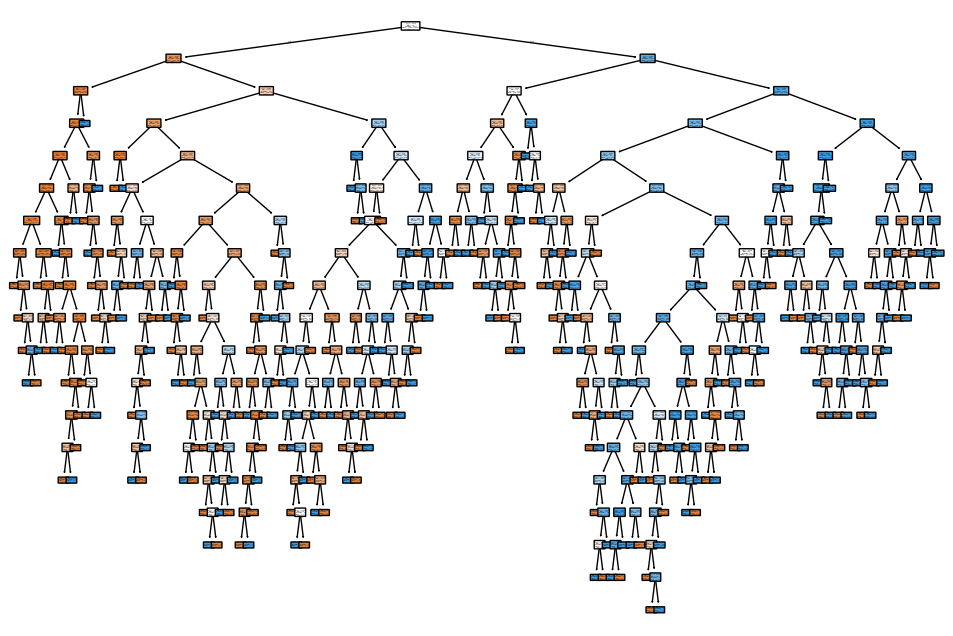

In [40]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

dtc = DecisionTreeClassifier(random_state=RANODM_STATE)

dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

accuracy_DTC = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random-Forest model: {accuracy_DTC * 100:.2f}%")

print("Confusion Matrix of Desicion-tree:")
print(confusion_matrix(y_test, y_pred))

print("\n\nClassification Report of Desicion-tree:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))
plot_tree(dtc, filled=True, class_names=y_test.unique().astype(str), rounded=True)

plt.show()


#### 🌲🌳 Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)

rfc.fit(x_train, y_train)

y_pred = rfc.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random-Forest model: {accuracy * 100:.2f}%")

print("Confusion Matrix of Random-forest:")
print(confusion_matrix(y_test, y_pred))

print("\n\nClassification Report of Ranodm-forest")
print(classification_report(y_test, y_pred))

Accuracy of Random-Forest model: 97.91%
Confusion Matrix of Random-forest:
[[671  17]
 [ 11 641]]


Classification Report of Ranodm-forest
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       688
           1       0.97      0.98      0.98       652

    accuracy                           0.98      1340
   macro avg       0.98      0.98      0.98      1340
weighted avg       0.98      0.98      0.98      1340



#### ⚡️ Adaptive Boosting

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_model_dtc = DecisionTreeClassifier(max_depth=1)

n_estimators_list = [5, 25, 50]
results = {}

for n_estimator in n_estimators_list:
    ada_model = AdaBoostClassifier(base_model_dtc, n_estimators=n_estimator, random_state=RANDOM_STATE)

    ada_model.fit(x_train, y_train)

    y_pred = ada_model.predict(x_test)

    results[n_estimator] = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
    }

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of Adaptinve-Boost model with {n_estimator} estimators: {accuracy * 100:.2f}%")

    print("\nConfusion Matrix for Adaptive-Boost Model:")
    print(results[n_estimator]['confusion_matrix'])
    print("\nClassification Report for Adaptive-Boost Model:")
    print(results[n_estimator]['classification_report'])




Accuracy of Adaptinve-Boost model with 5 estimators: 86.79%

Confusion Matrix for Adaptive-Boost Model:
[[598  90]
 [ 87 565]]

Classification Report for Adaptive-Boost Model:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       688
           1       0.86      0.87      0.86       652

    accuracy                           0.87      1340
   macro avg       0.87      0.87      0.87      1340
weighted avg       0.87      0.87      0.87      1340

Accuracy of Adaptinve-Boost model with 25 estimators: 90.45%

Confusion Matrix for Adaptive-Boost Model:
[[619  69]
 [ 59 593]]

Classification Report for Adaptive-Boost Model:
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       688
           1       0.90      0.91      0.90       652

    accuracy                           0.90      1340
   macro avg       0.90      0.90      0.90      1340
weighted avg       0.90      0.90      0.90     

#### ⚡️ XGBoost

In [43]:
from xgboost import XGBClassifier


xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=200,
    min_child_weight=0.8,  # min-samples-leaf
    max_depth=6,
    colsample_bytree=0.8,  # max-features
    random_state=RANDOM_STATE
)

xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)

acc_score_xgb = accuracy_score(y_test, y_pred)

print("Accuracy score of XGboost Model:  ", acc_score_xgb)

print("Confusion Matrix of XGboost:")
print(confusion_matrix(y_test, y_pred))

print("\n\nClassification Report of XGBoost:")
print(classification_report(y_test, y_pred))

Accuracy score of XGboost Model:   0.9850746268656716
Confusion Matrix of XGboost:
[[672  16]
 [  4 648]]


Classification Report of XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       688
           1       0.98      0.99      0.98       652

    accuracy                           0.99      1340
   macro avg       0.98      0.99      0.99      1340
weighted avg       0.99      0.99      0.99      1340



I tried out so many hyper parameters these gave the best accuracy.

#### Explanation of Hyper parameter

##### **learning_rate**:

The step size that we use for each iteration when we upadate the weights. Smaller rates make the model more complex and this could cause a better more accurate model or overfitting may accur. Larger values have a simpler model and it will converge faster most times but the accuary decreases.

The best practice of Learning rate is between 0.1 and 0.01.


##### **n_estimators**:

This is the number of boosting rounds (trees) in the model. A larger value improves performance but increases computation time.

The best practice of it is between 100 and 300.


##### **min_child_weight**:

This is the minimum sum of the weights in leaf. This prevent the model of having very small value weights for the leafs.

The samller values get more detail but risk overfitting and the larger makes the model simpler.

The best practice is between 1 to 10.

##### **max_depth:**

This is the maximujm depth of our tree in the model and this cotrols the complexity of our model. Larger values save more detail but it may overfit.
Smaller values generalize better but might miss important patterns.

Best Practice is with 3–6. We can reduce for simple datasets or increase for complex ones.

##### **colsample_bytree (max_features):**

This hyper parameter is between 1 and 0. The portion of features that could be used. The more the values uses more features and more detailed model. The less we introduce randomness in the model and will reduce overfitting possibilty.


### 🛠 From Scratch  
In this subsection, you should implement the SAMME algorithm for adaptive boosting from scratch.Then you should deploy this boosting model and a base estimator, which is Gaussian Naive Bayes here, to classify hotels.

In [44]:
from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.naive_bayes import GaussianNB
import numpy as np
class SimpleMultiClassBoosting(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=GaussianNB, n_estimators=50):
        self.base_estimator = base_estimator if base_estimator is not None else GaussianNB()
        self.n_estimators = n_estimators
        self.learners = []
        self.learner_weights = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.weights = (1/n_samples) * np.ones(n_samples, dtype=float) # initialize weights uniformly
        for _ in range(self.n_estimators):
            learner = GaussianNB() # instanciate model
            learner.fit(X, y, sample_weight=self.weights) # fit to samples, using weights
            pred = learner.predict(X) # predict the batch
            missClassified = pred != y # get index of misclassified samples
            # TODO : compute learner error rate according to SAMME algorithm
            # TODO : compute learner weight using SAMME algorithm
            # TODO : a classifier with error rate which is worse than random should be dropped
            # hint : error rate of untrained classifier : 1 - (1 / n_classes)

            # TODO : increase the weights of misclassified samples according to SAMME algorithm
            self.weights /= np.sum(self.weights) # renormalize weights to make them sum up to 1
            self.learners.append(learner)
            # TODO : store learner weight in self.learner_weights

    def predict(self, X):
        # note that X can contain multiple samples in shape of array, in which, each row corresponds to a query
        predictionsOfLearners = []
        for learner in self.learners:
            predictionsOfLearners.append(learner.predict(X)) # collect predictions from each learner
        # TODO : weighted vote for each sample's prediction across all learners, each learner's weight is stored in self.learner_weights
        # TODO : make final prediction by considering the label which has highest weighted vote
